<a href="https://colab.research.google.com/github/JayV1I/Aulas-pucc/blob/main/trabalhoN%C3%89fi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

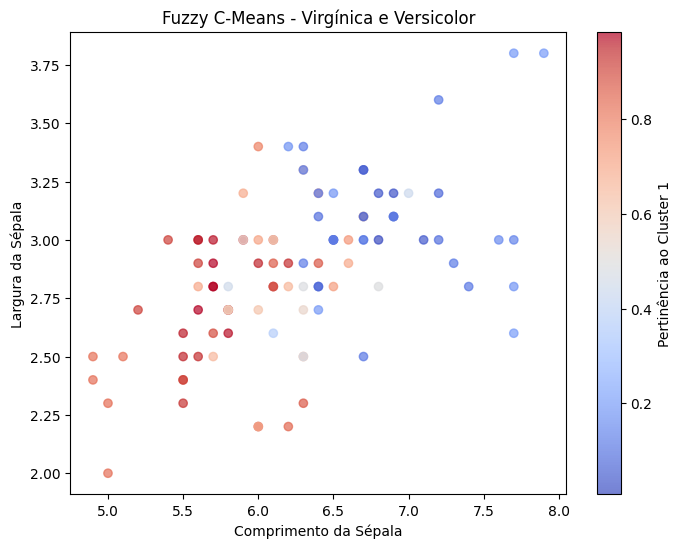

(   sepal_length  sepal_width  petal_length  petal_width species  Grupo  \
 0           5.1          3.5           1.4          0.2  setosa      2   
 1           4.9          3.0           1.4          0.2  setosa      2   
 2           4.7          3.2           1.3          0.2  setosa      2   
 3           4.6          3.1           1.5          0.2  setosa      2   
 4           5.0          3.6           1.4          0.2  setosa      2   
 
      Pert_0    Pert_1    Pert_2  
 0  0.001072  0.002304  0.996624  
 1  0.007498  0.016650  0.975853  
 2  0.006415  0.013760  0.979826  
 3  0.010108  0.022465  0.967427  
 4  0.001768  0.003762  0.994470  ,
     sepal_length  sepal_width  petal_length  petal_width     species  Grupo  \
 50           7.0          3.2           4.7          1.4  versicolor      0   
 51           6.4          3.2           4.5          1.5  versicolor      1   
 52           6.9          3.1           4.9          1.5  versicolor      0   
 53           5.5

In [ ]:


class AgrupamentoCMeans:
    def __init__(self, k=3, m=2, max_iter=100, tol=1e-5, random_state=None):
        self.k = k  # Número de clusters
        self.m = m  # Fator de difusão
        self.max_iter = max_iter
        self.tol = tol
        self.centroides = None
        self.U = None
        self.random_state = random_state

    def _inicializar_pertinencia(self, n_amostras):
        np.random.seed(self.random_state)
        U = np.random.rand(n_amostras, self.k)
        return U / np.sum(U, axis=1, keepdims=True)

    def ajustar(self, X):
        n_amostras = X.shape[0]
        self.U = self._inicializar_pertinencia(n_amostras)

        for _ in range(self.max_iter):
            centroides = self._calcular_centroides(X)
            U_novo = self._atualizar_pertinencia(X, centroides)

            if np.linalg.norm(U_novo - self.U) < self.tol:
                break

            self.U = U_novo
            self.centroides = centroides

        return self

    def _calcular_centroides(self, X):
        U_m = self.U ** self.m
        return (U_m.T @ X) / np.sum(U_m, axis=0, keepdims=True).T

    def _atualizar_pertinencia(self, X, centroides):
        distancias = cdist(X, centroides) + 1e-10  # Evitar divisão por zero
        expoente = 2 / (self.m - 1)
        inv_distancias = distancias ** -expoente
        return inv_distancias / np.sum(inv_distancias, axis=1, keepdims=True)

    def prever(self):
        return np.argmax(self.U, axis=1), self.U

iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1].values
# Aplicar C-Means
agrupador = AgrupamentoCMeans(k=3, m=2, random_state=42)
agrupador.ajustar(X)
rotulos, pertinencias = agrupador.prever()

iris['Grupo'] = rotulos
for i in range(3):
    iris[f'Pert_{i}'] = pertinencias[:, i]

iris_binario = iris[iris['species'].isin(['versicolor', 'virginica'])].copy()
X_binario = iris_binario[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.astype(float) # Select only numerical columns

agrupador_binario = AgrupamentoCMeans(k=2, m=2, random_state=42)
agrupador_binario.ajustar(X_binario)
rotulos_binario, pertinencias_binario = agrupador_binario.prever()

iris_binario['Grupo'] = rotulos_binario
for i in range(2):
    iris_binario[f'Pert_{i}'] = pertinencias_binario[:, i]

plt.figure(figsize=(8, 6))
plt.scatter(X_binario[:, 0], X_binario[:, 1], c=pertinencias_binario[:, 1], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Pertinência ao Cluster 1')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.title('Fuzzy C-Means - Virgínica e Versicolor')
plt.show()
iris.head(), iris_binario.head()

In [ ]:

class AgrupamentoCMeans:
    def __init__(self, k=3, m=2, max_iter=100, tol=1e-5, random_state=None):
        self.k = k
        self.m = m
        self.max_iter = max_iter
        self.tol = tol
        self.centroides = None
        self.U = None
        self.random_state = random_state

    def _inicializar_pertinencia(self, n_amostras):
        np.random.seed(self.random_state)
        U = np.random.rand(n_amostras, self.k)
        return U / np.sum(U, axis=1, keepdims=True)

    def ajustar(self, X):
        n_amostras = X.shape[0]
        self.U = self._inicializar_pertinencia(n_amostras)

        for _ in range(self.max_iter):
            centroides = self._calcular_centroides(X)
            U_novo = self._atualizar_pertinencia(X, centroides)

            if np.linalg.norm(U_novo - self.U) < self.tol:
                break

            self.U = U_novo
            self.centroides = centroides

        return self

    def _calcular_centroides(self, X):
        U_m = self.U ** self.m
        return (U_m.T @ X) / np.sum(U_m, axis=0, keepdims=True).T

    def _atualizar_pertinencia(self, X, centroides):
        distancias = cdist(X, centroides) + 1e-10
        expoente = 2 / (self.m - 1)
        inv_distancias = distancias ** -expoente
        return inv_distancias / np.sum(inv_distancias, axis=1, keepdims=True)

    def prever(self):
        return np.argmax(self.U, axis=1), self.U

iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1].values

agrupador = AgrupamentoCMeans(k=3, m=2, random_state=42)
agrupador.ajustar(X)
rotulos, pertinencias = agrupador.prever()

iris['Grupo'] = rotulos
for i in range(3):
    iris[f'Pert_{i}'] = pertinencias[:, i]

iris_binario = iris[iris['species'].isin(['versicolor', 'virginica'])].copy()

X_binario = iris_binario[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.astype(float)

agrupador_binario = AgrupamentoCMeans(k=2, m=2, random_state=42)
agrupador_binario.ajustar(X_binario)
rotulos_binario, pertinencias_binario = agrupador_binario.prever()

iris_binario['Grupo'] = rotulos_binario
for i in range(2):
    iris_binario[f'Pert_{i}'] = pertinencias_binario[:, i]

iris_pertinencias = iris[['species', 'Pert_0', 'Pert_1', 'Pert_2']].head()
iris_binario_pertinencias = iris_binario[['species', 'Pert_0', 'Pert_1']].head()

iris_pertinencias, iris_binario_pertinencias

(  species    Pert_0    Pert_1    Pert_2
 0  setosa  0.001072  0.002304  0.996624
 1  setosa  0.007498  0.016650  0.975853
 2  setosa  0.006415  0.013760  0.979826
 3  setosa  0.010108  0.022465  0.967427
 4  setosa  0.001768  0.003762  0.994470,
        species    Pert_0    Pert_1
 50  versicolor  0.564632  0.435368
 51  versicolor  0.258792  0.741208
 52  versicolor  0.664022  0.335978
 53  versicolor  0.068740  0.931260
 54  versicolor  0.275141  0.724859)

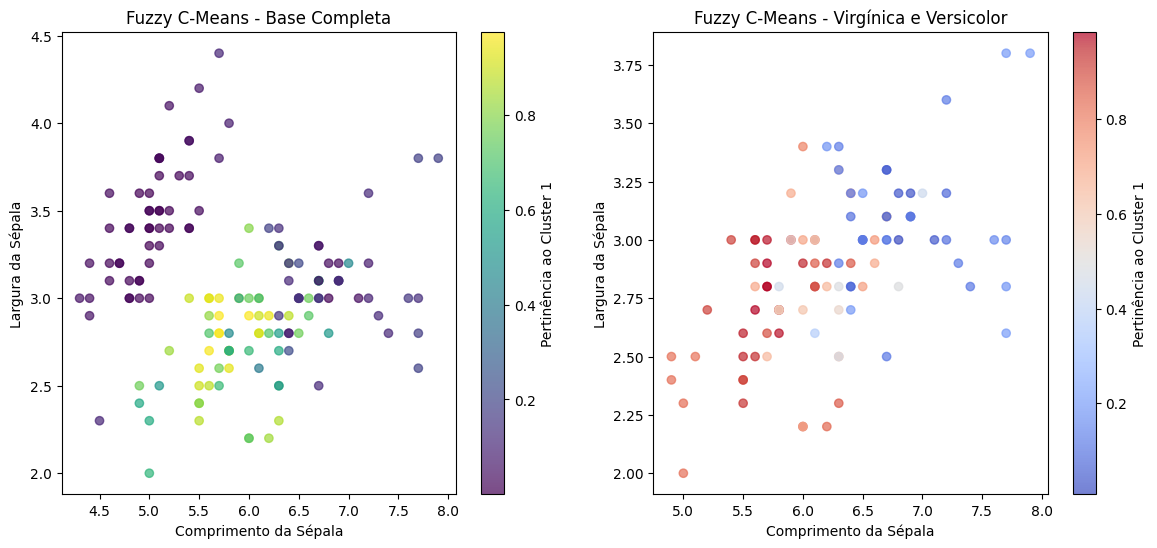

In [ ]:

class AgrupamentoCMeans:
    def __init__(self, k=3, m=2, max_iter=100, tol=1e-5, random_state=None):
        self.k = k
        self.m = m
        self.max_iter = max_iter
        self.tol = tol
        self.centroides = None
        self.U = None
        self.random_state = random_state

    def _inicializar_pertinencia(self, n_amostras):
        np.random.seed(self.random_state)
        U = np.random.rand(n_amostras, self.k)
        return U / np.sum(U, axis=1, keepdims=True)

    def ajustar(self, X):
        n_amostras = X.shape[0]
        self.U = self._inicializar_pertinencia(n_amostras)

        for _ in range(self.max_iter):
            centroides = self._calcular_centroides(X)
            U_novo = self._atualizar_pertinencia(X, centroides)

            if np.linalg.norm(U_novo - self.U) < self.tol:
                break

            self.U = U_novo
            self.centroides = centroides

        return self

    def _calcular_centroides(self, X):
        U_m = self.U ** self.m
        return (U_m.T @ X) / np.asarray(np.sum(U_m, axis=0, keepdims=True)).T

    def _atualizar_pertinencia(self, X, centroides):
        distancias = cdist(X, centroides) + 1e-10
        expoente = 2 / (self.m - 1)
        inv_distancias = distancias ** -expoente
        return inv_distancias / np.sum(inv_distancias, axis=1, keepdims=True)

    def prever(self):
        return np.argmax(self.U, axis=1), self.U

iris = sns.load_dataset('iris')
iris["species"] = iris["species"].replace({
    "Iris-setosa": "setosa",
    "Iris-versicolor": "versicolor",
    "Iris-virginica": "virginica"
})

X = iris.iloc[:, :-1].values

agrupador = AgrupamentoCMeans(k=3, m=2, random_state=42)
agrupador.ajustar(X)
rotulos, pertinencias = agrupador.prever()

iris['Grupo'] = rotulos
for i in range(3):
    iris[f'Pert_{i}'] = pertinencias[:, i]

iris_binario = iris[iris['species'].isin(['versicolor', 'virginica'])].copy()

X_binario = iris_binario[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.astype(float)

agrupador_binario = AgrupamentoCMeans(k=2, m=2, random_state=42)
agrupador_binario.ajustar(X_binario)
rotulos_binario, pertinencias_binario = agrupador_binario.prever()

iris_binario['Grupo'] = rotulos_binario
for i in range(2):
    iris_binario[f'Pert_{i}'] = pertinencias_binario[:, i]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=pertinencias[:, 1], cmap='viridis', alpha=0.7)
plt.colorbar(scatter1, ax=axes[0], label='Pertinência ao Cluster 1')
axes[0].set_xlabel('Comprimento da Sépala')
axes[0].set_ylabel('Largura da Sépala')
axes[0].set_title('Fuzzy C-Means - Base Completa')

scatter2 = axes[1].scatter(X_binario[:, 0], X_binario[:, 1], c=pertinencias_binario[:, 1], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter2, ax=axes[1], label='Pertinência ao Cluster 1')
axes[1].set_xlabel('Comprimento da Sépala')
axes[1].set_ylabel('Largura da Sépala')
axes[1].set_title('Fuzzy C-Means - Virgínica e Versicolor')

plt.show()

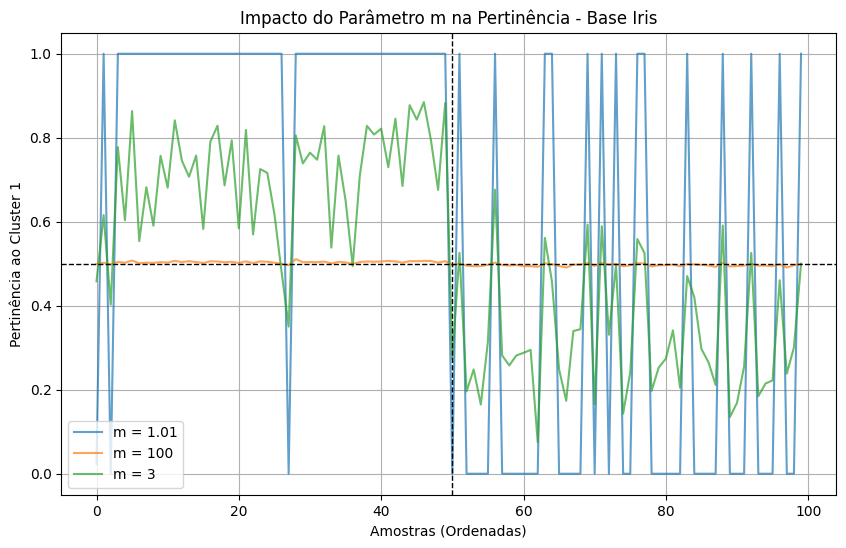

In [ ]:

valores_m = [1.01,100,3]

X_binario = iris_binario[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.astype(float)

plt.figure(figsize=(10, 6))

for m in valores_m:
    agrupador_m = AgrupamentoCMeans(k=2, m=m, random_state=42)
    agrupador_m.ajustar(X_binario)

    _, pertinencias_m = agrupador_m.prever()

    plt.plot(range(len(pertinencias_m)), pertinencias_m[:, 1], label=f"m = {m}", alpha=0.7)


plt.axvline(x=50, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
plt.xlabel("Amostras (Ordenadas)")
plt.ylabel("Pertinência ao Cluster 1")
plt.title("Impacto do Parâmetro m na Pertinência - Base Iris")
plt.legend()
plt.grid()

plt.show()

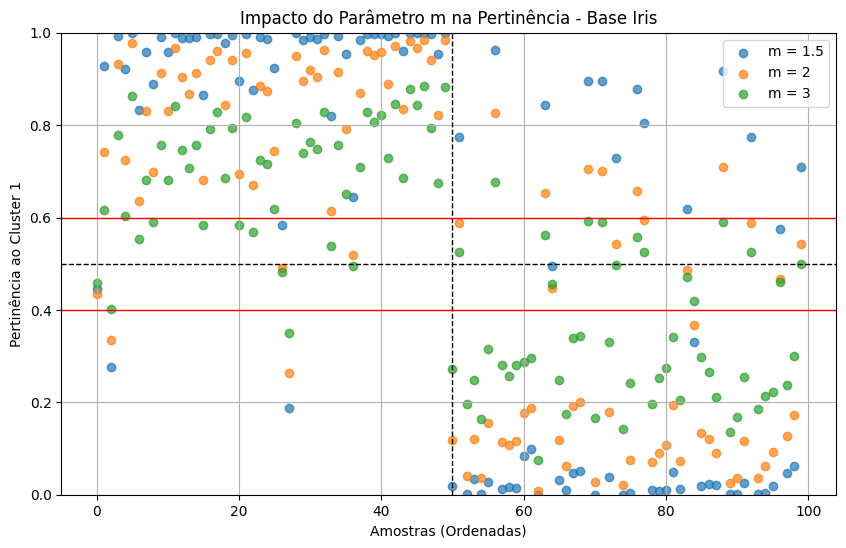

In [ ]:

valores_m = [1.5,2,3]

X_binario = iris_binario[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.astype(float)

plt.figure(figsize=(10, 6))

for m in valores_m:
    agrupador_m = AgrupamentoCMeans(k=2, m=m, random_state=42)
    agrupador_m.ajustar(X_binario)

    _, pertinencias_m = agrupador_m.prever()

    plt.scatter(range(len(pertinencias_m)), pertinencias_m[:, 1], label=f"m = {m}", alpha=0.7)


plt.axvline(x=50, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0.6, color='red', linestyle='-', linewidth=1)
plt.axhline(y=0.4, color='red', linestyle='-', linewidth=1)
plt.xlabel("Amostras (Ordenadas)")
plt.ylabel("Pertinência ao Cluster 1")
plt.title("Impacto do Parâmetro m na Pertinência - Base Iris")
plt.legend()
plt.ylim(0, 1)
plt.grid()

plt.show()

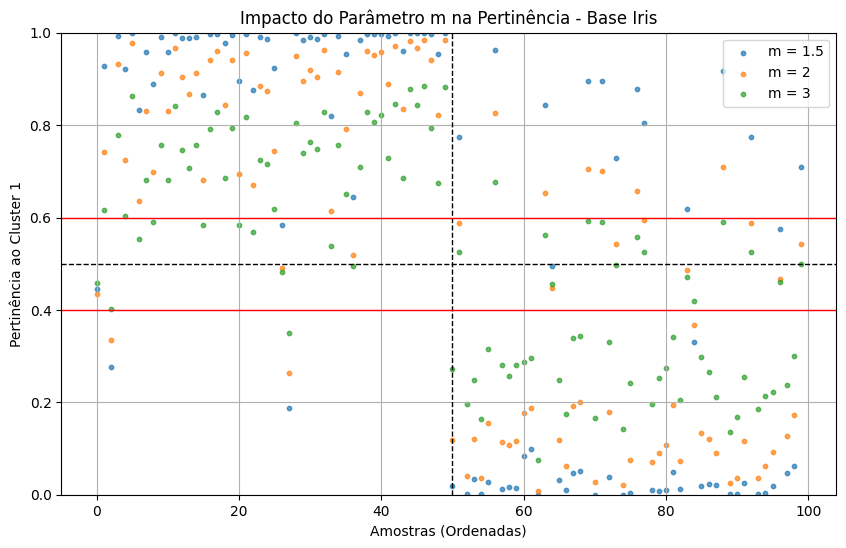

In [ ]:
valores_m = [1.5, 2, 3]

X_binario = iris_binario[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.astype(float)

plt.figure(figsize=(10, 6))

for m in valores_m:
    agrupador_m = AgrupamentoCMeans(k=2, m=m, random_state=42)
    agrupador_m.ajustar(X_binario)
    _, pertinencias_m = agrupador_m.prever()

    plt.scatter(range(len(pertinencias_m)), pertinencias_m[:, 1], label=f"m = {m}", alpha=0.7, s=10)

plt.axvline(x=50, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0.6, color='red', linestyle='-', linewidth=1)
plt.axhline(y=0.4, color='red', linestyle='-', linewidth=1)
plt.xlabel("Amostras (Ordenadas)")
plt.ylabel("Pertinência ao Cluster 1")
plt.title("Impacto do Parâmetro m na Pertinência - Base Iris")
plt.legend()
plt.ylim(0, 1)
plt.grid()

plt.show()